In [1]:
print("Hello Zuko Here !!!")

[1] "Hello Zuko Here !!!"


In [2]:
library(tidyr)
library(dplyr)
library(IRdisplay)
library(ggplot2)
library(Metrics)
library(caret)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'IRdisplay' was built under R version 4.1.2"
Warning message:
"package 'Metrics' was built under R version 4.1.2"
Warning message:
"package 'caret' was built under R version 4.1.2"
Loading required package: lattice


Attaching package: 'caret'


The following objects are masked from 'package:Metrics':

    precision, recall




# Data Load

In [3]:
path <- "D:/jupyterlab/silicon-valley-chapter-data-science-for-climate-change/src/data/train.csv"

In [4]:
df.climate <- read.csv(path)

In [5]:
head(df.climate)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,...,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,36,50.5,...,14,0,0,0,1,1,1,NA,248.682615,0
2,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000,1955,45,1.8,36,50.5,...,14,0,0,0,1,NA,1,12,26.500150,1
3,1,State_1,Commercial,Retail_Enclosed_mall,280025,1951,97,1.8,36,50.5,...,14,0,0,0,1,NA,1,12,24.693619,2
4,1,State_1,Commercial,Education_Other_classroom,55325,1980,46,1.8,36,50.5,...,14,0,0,0,1,NA,1,12,48.406926,3
5,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000,1985,100,2.4,36,50.5,...,14,0,0,0,1,1,1,NA,3.899395,4
6,1,State_1,Commercial,Warehouse_Selfstorage,119900,1956,NA,2.4,36,50.5,...,14,0,0,0,1,1,1,NA,6.597715,5


# Check distribution of the data

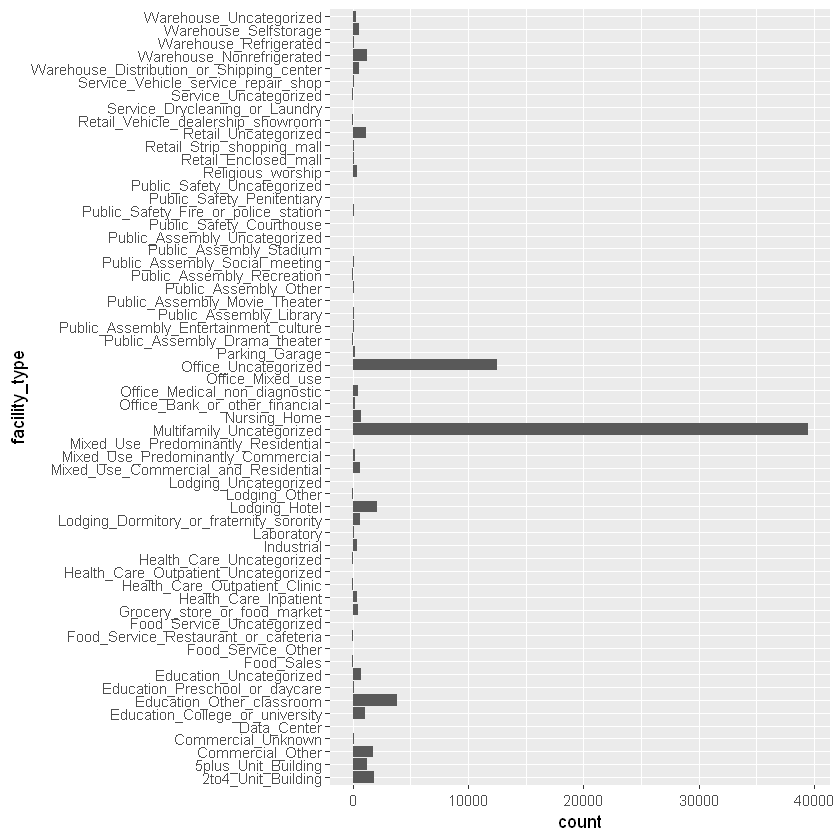

In [6]:
# histogram of facility type 
ggplot(df.climate, aes(y=facility_type)) + geom_bar()

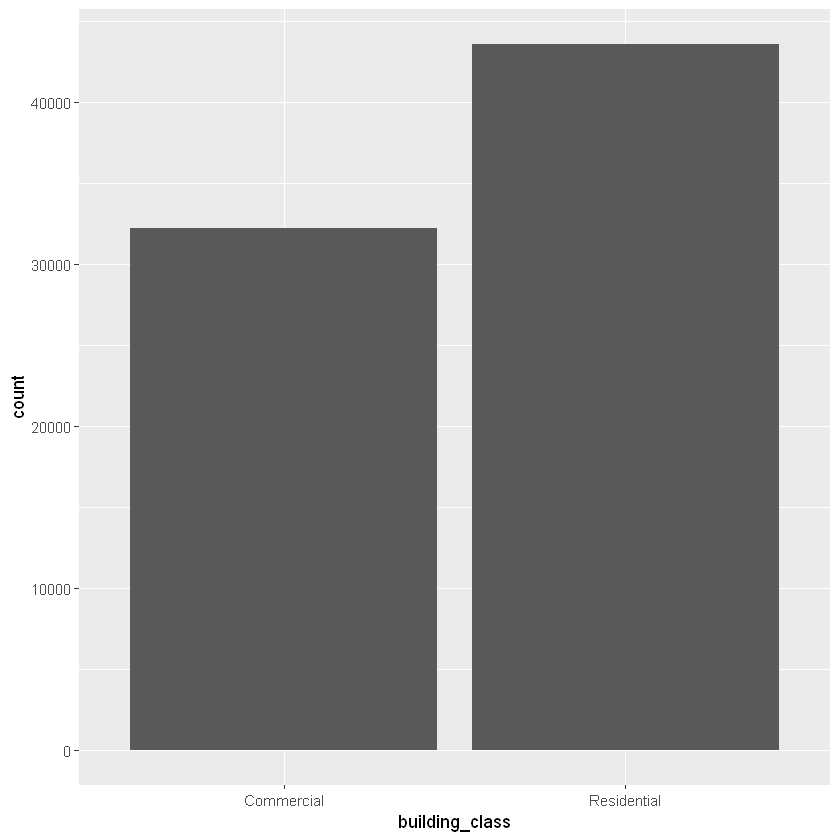

In [7]:
ggplot(df.climate, aes(x=building_class)) + geom_bar()

# Lets try on building Class for now 

1) We will try LR for Resedential Class 
2) We will keep floor area and try to predict site EUI
3) We will add one month at a time to check its effect 

In [8]:
# filter records on Residential Class 
df.res <- df.climate[df.climate$building_class == "Residential",]

### Train Test split

In [9]:
# Split into train and test
set.seed(123)
intrain<-createDataPartition(y=df.res$facility_type,p=0.8,list=FALSE)
training<-df.res[intrain,]
testing<-df.res[-intrain,]

In [10]:
model <- lm(site_eui ~ floor_area + january_avg_temp,data=training)

In [11]:
summary(model)


Call:
lm(formula = site_eui ~ floor_area + january_avg_temp, data = training)

Residuals:
   Min     1Q Median     3Q    Max 
-96.70 -20.76  -3.32  15.07 840.97 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.405e+02  1.534e+00  91.545   <2e-16 ***
floor_area        1.270e-06  1.418e-06   0.895    0.371    
january_avg_temp -1.804e+00  4.401e-02 -40.987   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40.03 on 34846 degrees of freedom
Multiple R-squared:  0.04754,	Adjusted R-squared:  0.04748 
F-statistic: 869.6 on 2 and 34846 DF,  p-value: < 2.2e-16


#### RMSE on train set

In [12]:
# Predict on train set
training$predicted_site_eui <- predict(model, newdata=training)


In [13]:
# RMSE on train set
rmse(training$site_eui, training$predicted_site_eui)

[1] 40.0269

In [14]:
#### RMSE on train set
testing$predicted_site_eui <- predict(model, newdata=testing)

In [15]:
rmse(testing$site_eui, testing$predicted_site_eui)

[1] 40.8185

### Add June month to the model and check

In [16]:
model <- lm(site_eui ~ floor_area + january_avg_temp + june_avg_temp,data=training)

In [17]:
summary(model)


Call:
lm(formula = site_eui ~ floor_area + january_avg_temp + june_avg_temp, 
    data = training)

Residuals:
   Min     1Q Median     3Q    Max 
-92.84 -19.55  -3.66  14.36 857.38 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.111e+02  9.729e+00 -11.416   <2e-16 ***
floor_area        1.915e-06  1.404e-06   1.363    0.173    
january_avg_temp -9.922e-01  5.349e-02 -18.548   <2e-16 ***
june_avg_temp     3.139e+00  1.199e-01  26.173   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.64 on 34845 degrees of freedom
Multiple R-squared:  0.0659,	Adjusted R-squared:  0.06582 
F-statistic: 819.4 on 3 and 34845 DF,  p-value: < 2.2e-16


In [18]:
# Predict on train set
training$predicted_site_eui <- predict(model, newdata=training)
rmse(training$site_eui, training$predicted_site_eui)

[1] 39.63916

In [19]:
# Predict on train set
testing$predicted_site_eui <- predict(model, newdata=testing)
rmse(testing$site_eui, testing$predicted_site_eui)

[1] 40.43365

### Adding 4 months to the model and check

In [24]:
model.ft <- lm(site_eui ~ floor_area + january_avg_temp+march_avg_temp+june_avg_temp+september_avg_temp+facility_type,data=training)
summary(model.ft)


Call:
lm(formula = site_eui ~ floor_area + january_avg_temp + march_avg_temp + 
    june_avg_temp + september_avg_temp + facility_type, data = training)

Residuals:
   Min     1Q Median     3Q    Max 
-91.55 -17.81  -3.69  13.28 830.17 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        1.128e+02  1.428e+01   7.904
floor_area                                        -1.040e-06  1.384e-06  -0.752
january_avg_temp                                   4.189e-01  9.370e-02   4.471
march_avg_temp                                    -6.892e-01  5.765e-02 -11.954
june_avg_temp                                     -9.370e-01  1.675e-01  -5.594
september_avg_temp                                -6.255e-02  1.026e-01  -0.609
facility_type5plus_Unit_Building                   4.908e+00  1.574e+00   3.119
facility_typeMixed_Use_Commercial_and_Residential  6.131e+01  2.148e+00  28.551
facility_typeMixed_Use_Pred

In [21]:
# Predict on train set
training$predicted_site_eui <- predict(model, newdata=training)
rmse(training$site_eui, training$predicted_site_eui)

[1] 39.50408

In [22]:
# Predict on train set
testing$predicted_site_eui <- predict(model, newdata=testing)
rmse(testing$site_eui, testing$predicted_site_eui)

[1] 40.36324

## Model with Facility type

In [ ]:
ft.model <- lm(site_eui ~ floor_area + january_avg_temp+march_avg_temp+june_avg_temp+september_avg_temp+   ,data=training)
summary(model)

In [25]:
# Predict on train set
training$predicted_site_eui <- predict(model, newdata=training)
rmse(training$site_eui, training$predicted_site_eui)

[1] 39.50408

In [26]:
# Predict on train set
testing$predicted_site_eui <- predict(model, newdata=testing)
rmse(testing$site_eui, testing$predicted_site_eui)

[1] 40.36324

### Dropping of Facility type

## Trying above model with log transforms 

### Log transform site eui

In [33]:
model.se.log <- lm(log(site_eui) ~ floor_area + january_avg_temp+march_avg_temp+june_avg_temp+september_avg_temp,data=training)
summary(model.se.log)


Call:
lm(formula = log(site_eui) ~ floor_area + january_avg_temp + 
    march_avg_temp + june_avg_temp + september_avg_temp, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3070 -0.1838  0.0555  0.2705  3.2198 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -8.583e-01  1.409e-01  -6.090 1.14e-09 ***
floor_area          3.924e-08  1.811e-08   2.167  0.03024 *  
january_avg_temp   -5.847e-03  1.165e-03  -5.017 5.27e-07 ***
march_avg_temp     -2.220e-03  7.484e-04  -2.967  0.00301 ** 
june_avg_temp       4.959e-02  1.630e-03  30.425  < 2e-16 ***
september_avg_temp  2.667e-02  1.193e-03  22.352  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5098 on 34843 degrees of freedom
Multiple R-squared:  0.1414,	Adjusted R-squared:  0.1413 
F-statistic:  1148 on 5 and 34843 DF,  p-value: < 2.2e-16


In [38]:
# Predict on train set trnsfrom to ln
training$predicted_site_eui <- predict(model.se.log, newdata=training)
rmse(log(training$site_eui), training$predicted_site_eui)

[1] 0.5097903

In [39]:
# Predict on train set trnsfrom to ln
testing$predicted_site_eui <- predict(model.se.log, newdata=testing)
rmse(log(testing$site_eui), testing$predicted_site_eui)

[1] 0.5151268

In [40]:
training$predicted_site_eui <- predict(model.se.log, newdata=training)
rmse(training$site_eui, exp(training$predicted_site_eui))

[1] 40.57411

In [41]:
testing$predicted_site_eui <- predict(model.se.log, newdata=testing)
rmse(testing$site_eui, exp(testing$predicted_site_eui))

[1] 41.50777

### Log transform floor area

In [43]:
model.fa.log <- lm(site_eui ~ log(floor_area) + january_avg_temp+march_avg_temp+june_avg_temp+september_avg_temp,data=training)
summary(model.fa.log)


Call:
lm(formula = site_eui ~ log(floor_area) + january_avg_temp + 
    march_avg_temp + june_avg_temp + september_avg_temp, data = training)

Residuals:
   Min     1Q Median     3Q    Max 
-93.25 -19.42  -3.91  14.12 861.13 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -179.68188   11.37652 -15.794  < 2e-16 ***
log(floor_area)      -0.65353    0.31488  -2.075    0.038 *  
january_avg_temp     -0.10669    0.09063  -1.177    0.239    
march_avg_temp       -0.43393    0.05803  -7.477 7.78e-14 ***
june_avg_temp         2.71691    0.12675  21.436  < 2e-16 ***
september_avg_temp    1.37062    0.09236  14.839  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.51 on 34843 degrees of freedom
Multiple R-squared:  0.07223,	Adjusted R-squared:  0.0721 
F-statistic: 542.6 on 5 and 34843 DF,  p-value: < 2.2e-16


In [47]:
# Predict on train set trnsfrom to ln
training$predicted_site_eui <- predict(model.fa.log, newdata=training)
rmse(training$site_eui, training$predicted_site_eui)

[1] 39.50459

In [48]:
# Predict on train set trnsfrom to ln
testing$predicted_site_eui <- predict(model.fa.log, newdata=testing)
rmse(testing$site_eui, testing$predicted_site_eui)

[1] 40.36326

### Log transform  both

In [50]:
model.fa.both <- lm(log(site_eui) ~ log(floor_area) + january_avg_temp+march_avg_temp+june_avg_temp+september_avg_temp,data=training)
summary(model.fa.both)


Call:
lm(formula = log(site_eui) ~ log(floor_area) + january_avg_temp + 
    march_avg_temp + june_avg_temp + september_avg_temp, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3083 -0.1840  0.0550  0.2705  3.2235 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.8905650  0.1468154  -6.066 1.33e-09 ***
log(floor_area)     0.0054199  0.0040636   1.334  0.18229    
january_avg_temp   -0.0059497  0.0011696  -5.087 3.65e-07 ***
march_avg_temp     -0.0021892  0.0007489  -2.923  0.00347 ** 
june_avg_temp       0.0493619  0.0016357  30.178  < 2e-16 ***
september_avg_temp  0.0265755  0.0011920  22.295  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5099 on 34843 degrees of freedom
Multiple R-squared:  0.1413,	Adjusted R-squared:  0.1412 
F-statistic:  1147 on 5 and 34843 DF,  p-value: < 2.2e-16


In [51]:
# Predict on train set trnsfrom to ln
training$predicted_site_eui <- predict(model.fa.both, newdata=training)
rmse(training$site_eui, exp(training$predicted_site_eui))

[1] 40.58064

In [52]:
# Predict on train set trnsfrom to ln
testing$predicted_site_eui <- predict(model.fa.both, newdata=testing)
rmse(testing$site_eui, exp(testing$predicted_site_eui))

[1] 41.5128